# The purpose of this study was to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens. 

# Observations and Insights (Review)


# The most effective drug is Capomulin. This drug has a capacity to decrease tumor volume and limit metastatic spread.

# Tumor Vol. vs TimePoint: As soon as you started medicine you can see the tumor volume went down. But i do also have some reservation from 35 - 40 timepoint where i do see an increase. But this is the most effective treatment. 

# Mice were also treated with Infubinol had less tumor growth. 
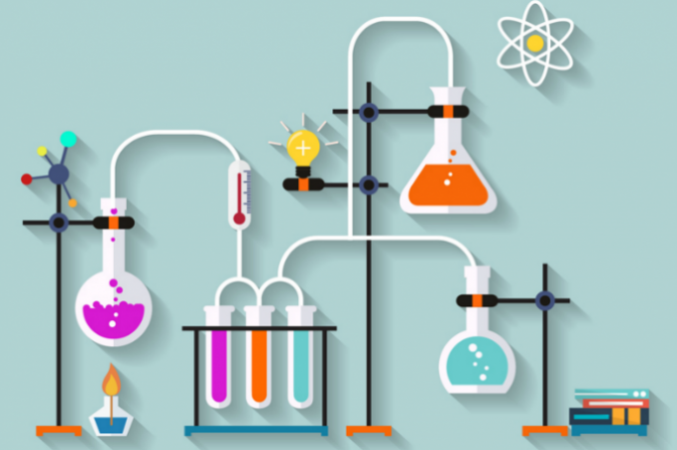

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combine_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice.
combine_df["Mouse ID"].nunique()

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combine_df[combine_df.duplicated(['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_df[combine_df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = combine_df[combine_df['Mouse ID'] != 'g989']

In [25]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
grp  = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
pd.DataFrame({
    'mean': grp.mean(),
    'median': grp.median(),
    'var': grp.var(),
    'std': grp.std(),
    'sem': grp.sem()
})

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

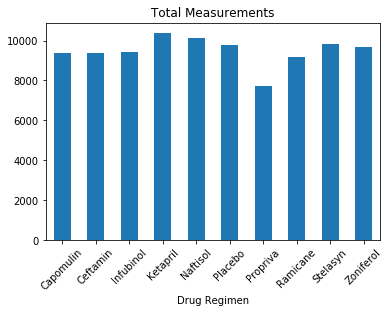

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grp.sum().plot(kind='bar',rot=45,title='Total Measurements')
plt.show()

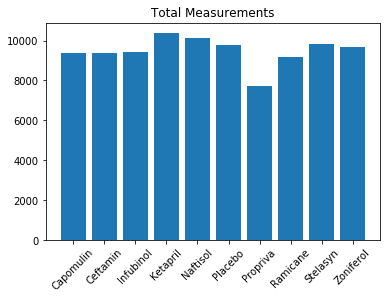

In [29]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(grp.sum().index, grp.sum())
plt.xticks(rotation=45)
plt.title('Total Measurements')
plt.show()

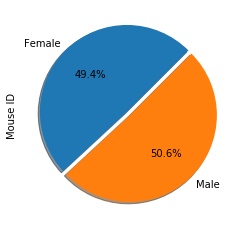

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pieChart = combine_df.groupby('Sex')['Mouse ID'].count()
pieChart.plot(kind='pie', autopct = '%1.1f%%', shadow = True, startangle=45,explode=(0.05,0))


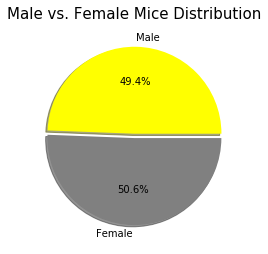

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pieChart, labels=["Male", "Female"], colors = ["yellow", "gray"], autopct="%1.1f%%", shadow=True, explode=(.05,0))
plt.title("Male vs. Female Mice Distribution", y=1.02, fontsize=15);
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
combine_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_timepoint = combine_df.groupby("Mouse ID").max()["Timepoint"].reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_merge_df = latest_timepoint[['Mouse ID', 'Timepoint']].merge(combine_df ,\
                on=["Mouse ID","Timepoint"], how='left')
new_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatment_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    df = new_merge_df[new_merge_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    iqr = df.quantile(.75) - df.quantile(.25)
    lower_bound = df.quantile(.25) - (1.5*iqr)
    upper_bound = df.quantile(.75) + (1.5*iqr)
    
    # add subset 
    treatment_list.append(df)
    
    # Determine outliers using upper and lower bounds
    print(f'{treatment} potential outliers: {df[(df<lower_bound) | (df>upper_bound)]}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


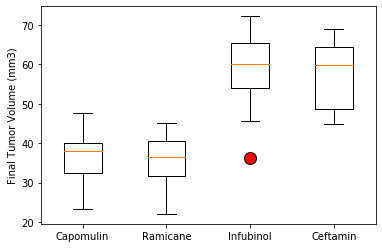

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_list
plt.boxplot(treatment_list,labels = treatments, flierprops={'markerfacecolor':'red','markersize':12})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

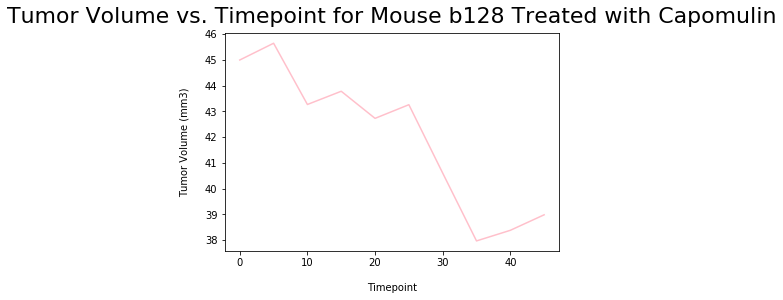

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combine_df.loc[combine_df["Drug Regimen"]== "Capomulin"] 
mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
x = mouse["Timepoint"]
y = mouse["Tumor Volume (mm3)"]
plt.plot(x,y, color="pink")
plt.xlabel("Timepoint", labelpad=15)
plt.ylabel("Tumor Volume (mm3)", labelpad=15)
plt.title("Tumor Volume vs. Timepoint for Mouse b128 Treated with Capomulin", y=1.02, fontsize=22);
plt.show()

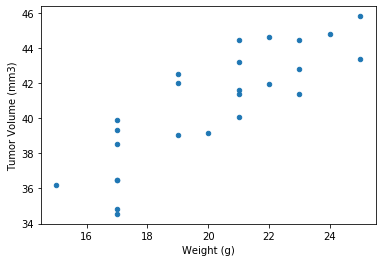

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap = capomulin_df.groupby('Mouse ID').mean().reset_index()
cap.plot.scatter('Weight (g)','Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse wieght and the average tumor volume is 0.84


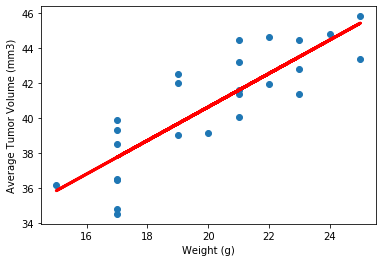

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
val = round(st.pearsonr(cap['Weight (g)'],cap['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse wieght and the average tumor volume is {val}')

plt.scatter(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')

model = st.linregress(cap['Weight (g)'], cap['Tumor Volume (mm3)'])
y = cap['Weight (g)']*model[0]+model[1]
plt.plot(cap['Weight (g)'],y, color='red', linewidth=3)

plt.show()